# 角色歧义检测分析

本notebook专门针对用户故事中的**角色歧义**进行检测和分析。

## 角色歧义定义
角色歧义是指用户故事中的参与者、使用者或系统角色不明确或存在多种可能解释。常见情况包括：
- 用户角色不明确（\"用户\"、\"管理员\"定义模糊）
- 系统边界不清（哪个系统执行什么操作）
- 权限级别不明（\"某些用户\"、\"授权用户\"）
- 交互角色混淆（谁发起操作，谁接收结果）

In [1]:
from ambiguity_detection_utils import AmbiguityDetector

detector = AmbiguityDetector("actor")
file_path = r"data/User Story Ambiguity Dataset_A Comprehensive Research Resource/Cornelius_2025_user_story_ambiguity_dataset.xlsx"
df_test = detector.load_and_prepare_data(file_path, create_balanced=True)

print(f"测试数据集: {len(df_test)} 个用户故事")

Actor歧义统计:
  有actor歧义: 865 (6.7%)
  无actor歧义: 11982 (93.3%)
平衡测试集: 1730 个用户故事
  HasAmbiguity=True: 865 (50.0%)
  HasAmbiguity=False: 865 (50.0%)
测试数据集: 1730 个用户故事


In [2]:
sample_size = detector.get_recommended_sample_size()

results = detector.run_evaluation(
    df_test, 
    sample_size=sample_size,
    prompt_generator=detector.generate_prompt
)

=== Actor歧义检测评估 ===
测试数据集: 1730 个用户故事
Processing model gpt-3.5-turbo...
API call failed (gpt-3.5-turbo): Connection error.
API call failed (gpt-3.5-turbo): Connection error.
  Processed 10/30 samples
  Processed 20/30 samples
  Processed 30/30 samples
  Actor Ambiguity Detection - Precision: 0.600, Recall: 1.000, F1: 0.750
Processing model deepseek-chat...
  Processed 10/30 samples
  Processed 20/30 samples
  Processed 30/30 samples
  Actor Ambiguity Detection - Precision: 0.600, Recall: 1.000, F1: 0.750


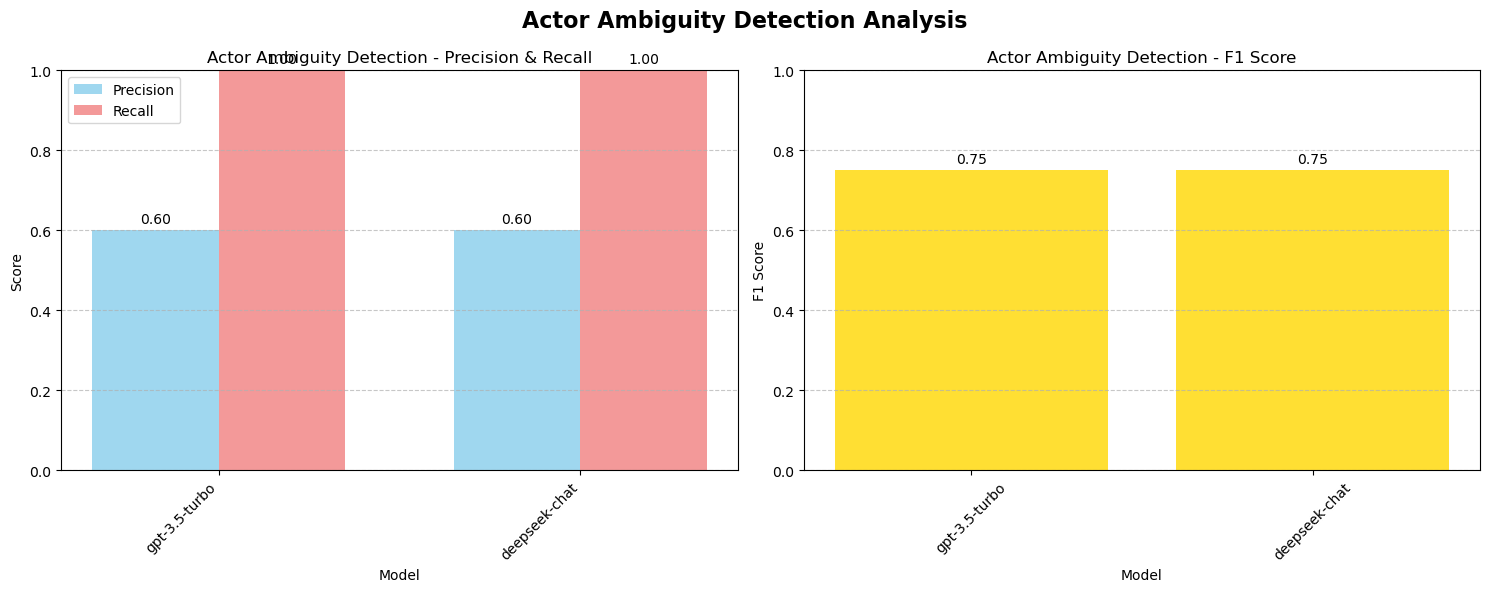

结果已保存到 actor_ambiguity_evaluation_results.json

=== Actor歧义检测评估总结 ===

Model: gpt-3.5-turbo
  Precision: 0.600
  Recall: 1.000
  F1 Score: 0.750

Model: deepseek-chat
  Precision: 0.600
  Recall: 1.000
  F1 Score: 0.750


In [3]:
detector.create_visualization(results, save_prefix="actor")
detector.save_results(results, "actor_ambiguity_evaluation_results.json")
detector.print_summary(results)

In [4]:
from ambiguity_detection_utils import analyze_errors
analyze_errors(results, "actor", num_examples=3)


=== Actor歧义错误分析 ===

分析模型: gpt-3.5-turbo (F1: 0.750)

误报 (False Positives): 12 个
漏报 (False Negatives): 0 个

误报示例 (模型认为有歧义，实际无歧义):

1. 用户故事: As a account holder, I want to download statements so that I can improve security
   模型识别的歧义部分: unknown
   模型推理: unknown

2. 用户故事: As a patient, I would like to access records to reduce errors
   模型识别的歧义部分: unknown
   模型推理: unknown

3. 用户故事: As a quality inspector, I want to track inventory so that I can improve efficiency
   模型识别的歧义部分: unknown
   模型推理: unknown

漏报示例 (实际有歧义，模型未检测到):
